# Fundamentals of tensor using in TensorFlow

Overview:
1. Introduction to tensors
2. Getting information from tensors
3. Manipulating tensors
4. Tensors and NumPy
5. Using @tf.function
6. Using GPUs (TPUs) with TensorFlow
7. Exercises

## Introduction to tensors

In [1]:
# Import TensorFlow
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


In [3]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# Check the number of dimensions (ndim)
scalar.ndim

0

In [5]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [6]:
vector.ndim

1

In [7]:
# Create a matrix
matrix = tf.constant([[10, 7],[7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [8]:
matrix.ndim

2

In [9]:
# Create another matrix
another_matrix = tf.constant([[10., 7.], 
                             [3., 2.],
                             [8., 9.]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
another_matrix.ndim

2

In [11]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 4,],
                       [4, 5, 6,]],
                      [[7, 8, 9,],
                       [10, 11, 12,]],
                      [[13, 14, 15,],
                       [16, 17, 18,]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  4],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [12]:
tensor.ndim

3

### Creating tensors with `tf.variable()`

In [13]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [14]:
# Create a tensor like above, but wit tf.Variable()
changeable_tensor = tf.Variable([10, 7])
unchaneable_tensor = tf.constant([10, 7])

changeable_tensor, unchaneable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [15]:
# Using .assign() method
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [16]:
unchaneable_tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>

### Creating random tensors
Random tensors are tensors of some arbitrary size that contain random numbers

In [17]:
# Create two random tensors
random_1 = tf.random.Generator.from_seed(44)
random_1 = random_1.normal(shape=(3, 2))

random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7535805 , -0.57166284],
       [ 0.1480774 , -0.23362993],
       [-0.3522796 ,  0.40621263]], dtype=float32)>

In [18]:
import numpy as np
import pandas as pd

In [19]:
random_d_tensor = tf.random.Generator.from_seed(44).normal(shape=(777,))

In [20]:
df = pd.DataFrame(random_d_tensor.numpy(), np.arange(0,len(random_d_tensor.numpy())))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

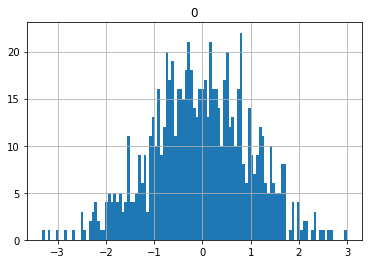

In [21]:
df.hist(bins=111)

### Shuffle the order of elements in a tensor

In [22]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

In [23]:
# Shuffle the tensor
tf.random.shuffle(not_shuffled, seed=1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]])>

In [24]:
tf.random.set_seed(1)
tf.random.shuffle(not_shuffled, seed=3)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]])>

### Other ways to make tensors

In [25]:
tf.ones(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [26]:
tf.zeros([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors
The main dofference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU.

In [27]:
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [28]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [29]:
A_1 = tf.constant(numpy_A, shape=(2, 3, 4))
A_1

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])>

In [30]:
A_2 = tf.constant(numpy_A, shape = (2, 3, 2, 2))
A_2

<tf.Tensor: shape=(2, 3, 2, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]],


       [[[13, 14],
         [15, 16]],

        [[17, 18],
         [19, 20]],

        [[21, 22],
         [23, 24]]]])>

## Getting information from tensors

When dealing with tensor you probabluy want to be aware of the following attributes:
* Shape
* Rank
* Axis or dimension
* Size

In [31]:
A_2.shape

TensorShape([2, 3, 2, 2])

In [32]:
A_2.ndim

4

In [33]:
A_2[1,1,1,1]

<tf.Tensor: shape=(), dtype=int32, numpy=20>

In [34]:
tf.size(A_2)

<tf.Tensor: shape=(), dtype=int32, numpy=24>

In [35]:
A_2.dtype

tf.int32

### Indexing tensors

In [36]:
A_2[:2,:1,:2,:1]

<tf.Tensor: shape=(2, 1, 2, 1), dtype=int32, numpy=
array([[[[ 1],
         [ 3]]],


       [[[13],
         [15]]]])>

In [37]:
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

In [38]:
# Get the last item of each  row of our tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4])>

In [39]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [40]:
tf.expand_dims(rank_2_tensor, axis=-1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [41]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]])>

In [42]:
tf.expand_dims(rank_2_tensor, axis=1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 3,  4]]])>

## Manipulating tensors (tensor operations)

**Basic operations**

In [43]:
# You cand add values to a tensor using the addition operator

In [44]:
tensor = tf.constant([[10,7], [3, 4]])

In [45]:
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]])>

In [46]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [47]:
tensor - 3

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[7, 4],
       [0, 1]])>

In [48]:
tensor / 2

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[5. , 3.5],
       [1.5, 2. ]])>

In [49]:
# We can use tensorflow built-in functions
tf.multiply(tensor, 44)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[440, 308],
       [132, 176]])>

#### Matrix multiplication
In machine learning matrix multiplication i one of most common tensor operations.

In [50]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [51]:
# Create a (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
Y = tf.constant([[7,8],
                [9, 10],
                [10, 11]])

In [52]:
X @ tf.transpose(Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  32],
       [ 53,  67,  74],
       [ 83, 105, 116]])>

In [53]:
# ! The inner dimensions must match
# ! The output matrix is of the sape of outer dimensions

tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 84,  93],
       [110, 122]])>

In [54]:
tf.transpose(X)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]])>

In [55]:
tf.reshape(X, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [56]:
tf.reshape(X, shape=(1,6))

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6]])>

In [57]:
np.ravel(X)

array([1, 2, 3, 4, 5, 6])

** The dot product **
Matrix multiplication is also referred as the dot product
You can perfrom. m. m. using:
* `tf.matmul()`
* `tf.tensordot()`


In [58]:
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 84,  93],
       [110, 122]])>

In [59]:
tf.tensordot(tf.transpose(X), Y, axes=0)

<tf.Tensor: shape=(2, 3, 3, 2), dtype=int32, numpy=
array([[[[ 7,  8],
         [ 9, 10],
         [10, 11]],

        [[21, 24],
         [27, 30],
         [30, 33]],

        [[35, 40],
         [45, 50],
         [50, 55]]],


       [[[14, 16],
         [18, 20],
         [20, 22]],

        [[28, 32],
         [36, 40],
         [40, 44]],

        [[42, 48],
         [54, 60],
         [60, 66]]]])>

In [60]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [10, 11]])>)

#### Changing the datatype of a tensor

In [61]:
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [62]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [63]:
# Change from float32 to float16 (reducing precision)

B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [64]:
E = C / tf.cast(B, dtype=C.dtype)

In [65]:
E

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([7.        , 1.42857143])>

In [66]:
RR = tf.cast((C / tf.cast(B, dtype=C.dtype)), dtype=tf.int8)
RR

<tf.Tensor: shape=(2,), dtype=int8, numpy=array([7, 1], dtype=int8)>

#### Aggregating tensors

Let's go through the following forms of aggregation:
* get absolute values
* get the minimum
* get the maximum
* get the mean
* get the sum 
* get the variance 
* get the datndard deviation

In [67]:
# Get absolute values
D = tf.constant([1, -3, -8])
D

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 1, -3, -8])>

In [68]:
tf.abs(D)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 8])>

In [69]:
# Get the minimum of a tensor
arr = np.random.randint(0, 100, size=(3, 4, 5))
TT = tf.constant(arr)
TT

<tf.Tensor: shape=(3, 4, 5), dtype=int32, numpy=
array([[[56, 19, 66, 35, 62],
        [25, 65, 76, 71, 20],
        [17, 60, 34, 33, 99],
        [14, 85, 89, 41, 92]],

       [[82,  7, 80, 22, 79],
        [18, 89, 22, 55, 98],
        [33, 14, 42,  0, 42],
        [65,  3, 74, 25, 56]],

       [[78,  7,  9, 41, 18],
        [52,  9, 19, 98,  3],
        [93, 23, 59, 97, 12],
        [81, 24, 20, 43, 65]]])>

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

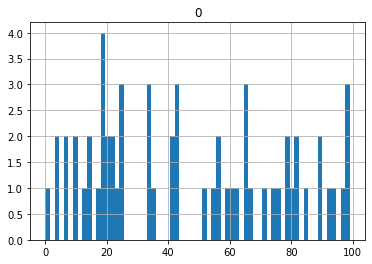

In [70]:
pd.DataFrame(np.ravel(TT)).hist(bins=66)

In [71]:
tf.math.reduce_min(TT)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [72]:
# Get the maximum of a tensor
tf.math.reduce_max(TT)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [73]:
# Get the sum of a tensor
tf.math.reduce_sum(TT)

<tf.Tensor: shape=(), dtype=int32, numpy=2816>

In [74]:
# Get the mean of a tensor 
tf.math.reduce_mean(TT)

<tf.Tensor: shape=(), dtype=int32, numpy=46>

In [75]:
TT.dtype

tf.int32

In [76]:
# Get the variance of a tensor 
tf.math.reduce_variance(tf.cast(TT, dtype=tf.float16))

<tf.Tensor: shape=(), dtype=float16, numpy=909.0>

In [77]:
# Get the standard deviation of a tensor 
tf.math.reduce_std(tf.cast(TT, dtype=tf.float16))

<tf.Tensor: shape=(), dtype=float16, numpy=30.16>

In [78]:
import tensorflow_probability as tfp

In [79]:
tfp.__version__

'0.11.0'

In [80]:
tfp.stats.stddev(tf.cast(TT, dtype=tf.float16))

<tf.Tensor: shape=(4, 5), dtype=float16, numpy=
array([[11.43 ,  5.656, 30.7  ,  7.93 , 25.7  ],
       [14.66 , 33.53 , 26.19 , 17.73 , 41.38 ],
       [32.72 , 19.9  , 10.42 , 40.25 , 36.06 ],
       [28.56 , 34.78 , 29.62 ,  8.05 , 15.3  ]], dtype=float16)>

In [81]:
tf.cast(TT, dtype=tf.float16).shape

TensorShape([3, 4, 5])

In [82]:
for axis in range(0,3):
    r = tfp.stats.stddev(tf.cast(TT, dtype=tf.float16), sample_axis=axis)
    print(r)

tf.Tensor(
[[11.43   5.656 30.7    7.93  25.7  ]
 [14.66  33.53  26.19  17.73  41.38 ]
 [32.72  19.9   10.42  40.25  36.06 ]
 [28.56  34.78  29.62   8.05  15.3  ]], shape=(4, 5), dtype=float16)
tf.Tensor(
[[16.66 23.98 20.33 15.3  31.14]
 [25.3  35.28 23.67 19.58 21.44]
 [14.95  7.79 19.11 27.77 23.98]], shape=(3, 5), dtype=float16)
tf.Tensor(
[[17.86 23.9  28.72 31.22]
 [32.6  33.   16.61 26.55]
 [26.6  35.22 34.88 23.45]], shape=(3, 4), dtype=float16)


#### Find the positional maximum and minimum

In [83]:
# Create a new tensor from uniform diatribution

tf.random.set_seed(42)
F=tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [84]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [85]:
# Find the value of the positional argument
print(F[tf.argmax(F)])
F[tf.argmax(F)] == tf.reduce_max(F)

tf.Tensor(0.9671384, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [86]:
# Find the positional minimum 
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [87]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

#### Squeezing a tensor

In [88]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50, 1, 2]), shape=(1, 1, 1, 2, 1, 50))

In [89]:
G

<tf.Tensor: shape=(1, 1, 1, 2, 1, 50), dtype=float32, numpy=
array([[[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255,
            0.03366041, 0.68467236, 0.74011743, 0.8724445 ,
            0.22632635, 0.22319686, 0.3103881 , 0.7223358 ,
            0.13318717, 0.5480639 , 0.5746088 , 0.8996835 ,
            0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
            0.72942245, 0.54583454, 0.10756552, 0.6767061 ,
            0.6602763 , 0.33695042, 0.60141766, 0.21062577,
            0.8527372 , 0.44062173, 0.9485276 , 0.23752594,
            0.81179297, 0.5263394 , 0.494308  , 0.21612847,
            0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
            0.23764038, 0.7817228 , 0.9671384 , 0.06870162,
            0.79873943, 0.66028714, 0.5871513 , 0.16461694,
            0.7381023 , 0.32054043]],

          [[0.6073899 , 0.46523476, 0.97803545, 0.7223145 ,
            0.32347047, 0.82577336, 0.4976915 , 0.19483674,
            0.7588748 , 0.3380444 , 0.28128064, 0.31513572,


In [90]:
G_squeezed = tf.squeeze(G)

In [91]:
G_squeezed

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       [0.6073899 , 0.46523476, 0.97803545, 0.7223145 , 0.32347047,
        0.82577336, 0.4976915 , 0.19483674, 0.7588748 , 0.3380444 ,
        0.28128064, 0.31513572, 0.60670924, 0.7498598 , 0.5016055 ,
        0.18282163, 0.13179815, 0.64636123, 0.9559475 , 0.6670735 

#### One-hot encoding tensors

In [92]:
# Create a list of indices

some_list = [0, 1, 2, 3]

In [93]:
tf.one_hot(some_list, depth=len(some_list)-1)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [94]:
# Specify custom values for one-hot encoding

tf.one_hot(some_list, depth=len(some_list)-1, on_value=1, off_value=-1)

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1],
       [-1, -1, -1]])>

#### Squaring, log and root square

In [95]:
H = tf.random.normal([2, 2])
H

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.08422458, -0.86090374],
       [ 0.37812304, -0.00519627]], dtype=float32)>

In [96]:
tf.square(H)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[7.0937802e-03, 7.4115527e-01],
       [1.4297704e-01, 2.7001261e-05]], dtype=float32)>

In [97]:
tf.sqrt(H)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.29021472,        nan],
       [0.61491704,        nan]], dtype=float32)>

In [98]:
tf.math.log(H)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-2.4742684,        nan],
       [-0.9725356,        nan]], dtype=float32)>

In [99]:
tf.math.sinh(H)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.0843242 , -0.97125876],
       [ 0.38719815, -0.0051963 ]], dtype=float32)>

In [100]:
tf.random.set_seed(42)
x_vals = list(set(tf.random.normal([20]).numpy()))
x_vals

[0.3274685,
 -0.8426258,
 0.3194337,
 -0.5573232,
 0.539707,
 1.6994323,
 0.28893656,
 -0.26454744,
 -0.59722406,
 -0.62044144,
 0.8504023,
 -0.40604794,
 0.9058464,
 0.29855987,
 -1.0392479,
 -1.4075519,
 -1.9171132,
 -3.0258412,
 -2.3880599,
 -1.5066116]

In [101]:
y_vals = tf.sinh(x_vals).numpy()
y_vals

array([  0.33335268,  -0.9459394 ,   0.32489386,  -0.58662623,
         0.5662926 ,   2.6440265 ,   0.29297364,  -0.267644  ,
        -0.6333653 ,  -0.6610209 ,   0.9566726 ,  -0.41729814,
         1.0349127 ,   0.3030152 ,  -1.2366847 ,  -1.9205993 ,
        -3.3271327 , -10.281409  ,  -5.4002666 ,  -2.1448793 ],
      dtype=float32)

In [102]:
sinh_df = pd.DataFrame(x_vals, y_vals)

In [103]:
import matplotlib.pyplot as plt

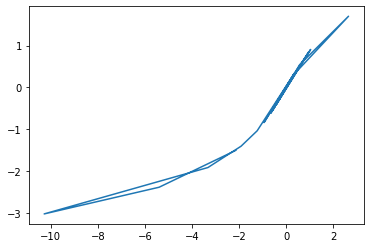

In [104]:
plt.plot(sinh_df)

### Tensors and Numpy

In [105]:
# Create a tensor directly from a NumPy array

J = tf.constant(np.array([1., 3., 6.2]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1. , 3. , 6.2])>

In [106]:
# Convert our tensor back to NumPy array
np.array(J)

array([1. , 3. , 6.2])

In [107]:
J.numpy()

array([1. , 3. , 6.2])

In [108]:
J[0]

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [109]:
# The default types when creating a tensor from a NumPy array and using the quicker method
numpy_K = tf.constant(np.array([3., 44.]))
tensor_K = tf.constant([3., 44.])
# Check the datatypes
numpy_K.dtype, tensor_K.dtype

(tf.float64, tf.float32)

In [110]:
numpy_L = tf.constant(np.array([3, 44]))
tensor_L = tf.constant([3, 44])
# Check the datatypes
numpy_L.dtype, tensor_L.dtype

(tf.int32, tf.int32)

### Using the `@tf.function` decorator

In [111]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [112]:
tf.config.list_physical_devices('GPU')

[]

In [113]:
import tensorflow-gpu as tgp

SyntaxError: invalid syntax (799945770.py, line 1)

In [ ]:
!nvidia-smi